# 

# Ch. 4 – Correlations

## Figure 4.1 Illustration of correlations

This data illustrates different correlation coefficients by taking the
inspiration from a study by Maruskin et al. (2012), who collected
self-reports related to chills. As we don’t have the access to the data,
the correlations are created by simulating a multivariate normal
distribution (see `generate_data.R`) just to illustrate the way the
pattern of correlation changes.

In [ ]:
#### Libraries ------------------------------------------------
library(MASS)
library(ggplot2)
options(repr.plot.width = 6, repr.plot.height = 6) # Default plot size for Colab

#### define a function -------------------------------------
generate_data <- function(N=NULL,r=NULL,m_x=NULL,range_x=NULL,m_y=NULL,range_y=NULL){
  # Generate data
  out <- as.data.frame(mvrnorm(N, mu = c(0,0), 
                               Sigma = matrix(c(1,r,r,1), ncol = 2), 
                               empirical = TRUE))
  # Calculations to create multiplication and addition factors for mean and range of X and Y
  mx.factor <- range_x/6
  addx.factor <- m_x - (mx.factor*3)
  my.factor <- range_y/6
  addy.factor <- m_y - (my.factor*3)
  
  # Adjust so that values are positive and include factors to match desired means and ranges
  out$V1.s <- (out$V1 - min(out$V1))*mx.factor + addx.factor
  out$V2.s <- (out$V2 - min(out$V2))*my.factor + addy.factor
  return<-out
}

In [ ]:
#### Correlations we want to simulate ------------------

N <- 362
r <- 0.32      # Desired correlation
d.mx <- 10     # Desired mean of X
d.rangex <- 17 # Desired range of X
d.my <- 10     # Desired mean of Y
d.rangey <- 17 # Desired range of Y

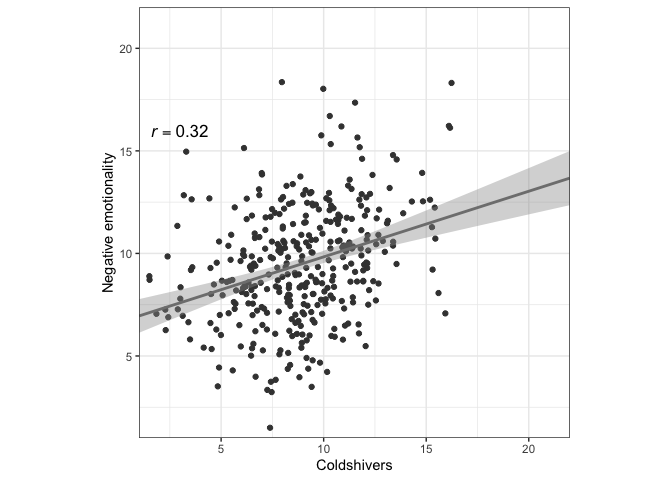

In [ ]:
#### Coldshivers and negative emotionality  --------------
d1 <- generate_data(N, r, d.mx, d.rangex, d.my, d.rangey)

# Plot scatterplot along with regression line
g1 <- ggplot(d1, aes(x=V1.s, y=V2.s)) + 
  geom_point(colour='gray25') + 
  xlab('Coldshivers')+
  ylab('Negative emotionality')+
  annotate("text",x = 3.0, y=16,label = "italic(r)==0.32", parse=TRUE,size=4.5)+
  geom_smooth(formula = y ~ x, method='lm',color='gray50',fullrange=TRUE)+
  scale_x_continuous(limits = c(1,22),expand = c(0.00,0.00),breaks = seq(0,20,by=5))+
  scale_y_continuous(limits = c(1,22),expand = c(0.00,0.00),breaks = seq(0,20,by=5))+
  coord_fixed()+
  theme_bw()
print(g1)

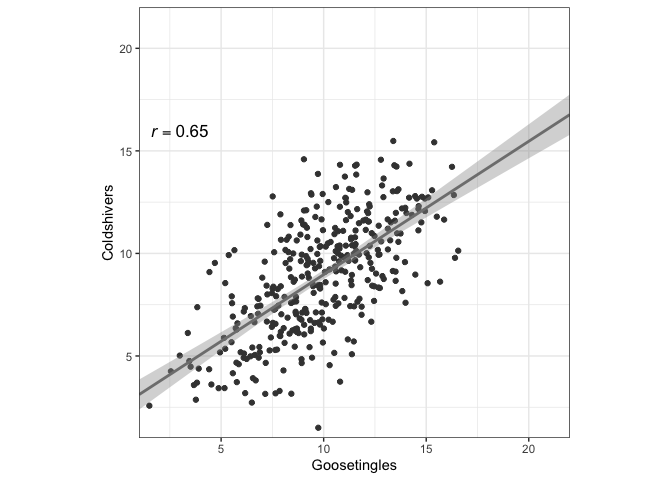

In [ ]:
#### Coldshivers and Goosetingles  --------------
set.seed(101)
r <- 0.65 # Desired correlation
d2 <- generate_data(N, r, d.mx, d.rangex, d.my, d.rangey)
g2 <- ggplot(d2, aes(x=V1.s, y=V2.s)) + 
  geom_point(colour='gray25') + 
  xlab('Goosetingles')+
  ylab('Coldshivers')+
  annotate("text",x = 3.0, y=16,label = "italic(r)==0.65", parse=TRUE,size=4.5)+
  geom_smooth(formula = y ~ x, method='lm',color='gray50',fullrange=TRUE)+
  scale_x_continuous(limits = c(1,22),expand = c(0.00,0.00),breaks = seq(0,20,by=5))+
  scale_y_continuous(limits = c(1,22),expand = c(0.00,0.00),breaks = seq(0,20,by=5))+
  coord_fixed()+
  theme_bw()
print(g2)

(`geom_smooth()`).

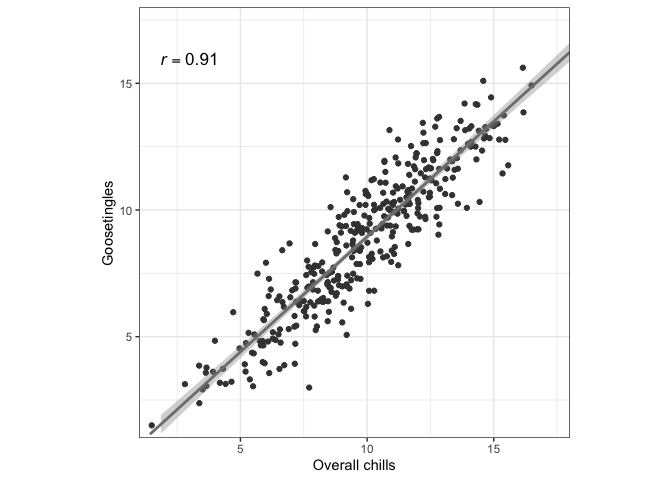

In [ ]:
#### Overall chills and Goosetingles  --------------
set.seed(101)
r <- 0.91
d3 <- generate_data(N, r, d.mx, d.rangex, d.my, d.rangey)
# Plot scatterplot along with regression line
g3 <- ggplot(d3, aes(x=V1.s, y=V2.s)) + 
  geom_point(colour='gray25') + 
  xlab('Overall chills')+
  ylab('Goosetingles')+
  annotate("text",x = 3.0, y=16,label = "italic(r)==0.91", parse=TRUE,size=4.5)+
  geom_smooth(formula = y ~ x, method='lm',color='gray50',fullrange=TRUE)+
  scale_x_continuous(limits = c(1,18),expand = c(0.00,0.00),breaks = seq(0,20,by=5))+
  scale_y_continuous(limits = c(1,18),expand = c(0.00,0.00),breaks = seq(0,20,by=5))+
  coord_fixed()+
  theme_bw()
print(g3)

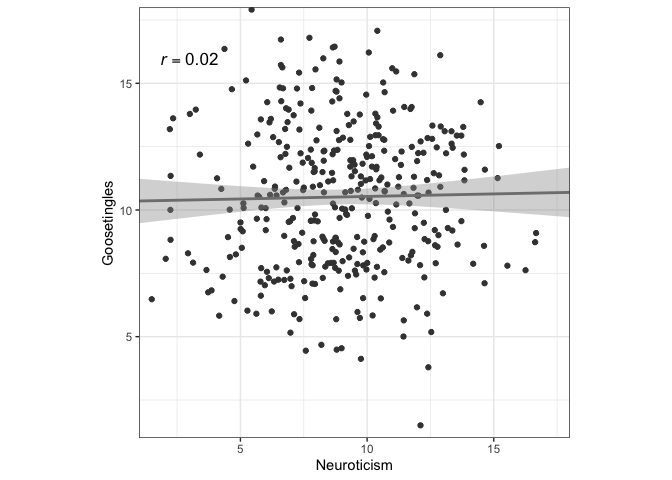

In [ ]:
#### Neuroticism and Goosetingles  --------------
set.seed(101)
r <- 0.02
d4 <- generate_data(N, r, d.mx, d.rangex, d.my, d.rangey)
# Plot scatterplot along with regression line
g4 <- ggplot(d4, aes(x=V1.s, y=V2.s)) + 
  geom_point(colour='gray25') + 
  xlab('Neuroticism')+
  ylab('Goosetingles')+
  annotate("text",x = 3.0, y=16,label = "italic(r)==0.02", parse=TRUE,size=4.5)+
  geom_smooth(formula = y ~ x, method='lm',color='gray50',fullrange=TRUE)+
  scale_x_continuous(limits = c(1,18),expand = c(0.00,0.00),breaks = seq(0,20,by=5))+
  scale_y_continuous(limits = c(1,18),expand = c(0.00,0.00),breaks = seq(0,20,by=5))+
  coord_fixed()+
  theme_bw()
print(g4)

## Example 4.2 Meta-analysis

This recreates forest plot with a small sample of studies (10) from 105
experiments analysed by Cooper (2020).


Loading the 'metafor' package (version 4.6-0). For an
introduction to the package please type: help(metafor)

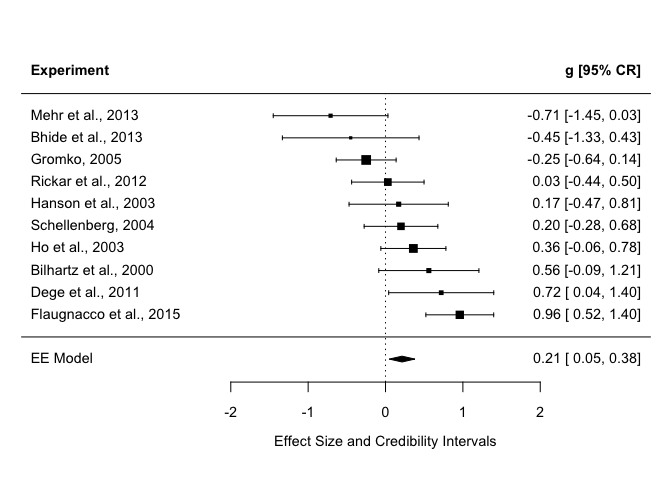

In [ ]:
#install.packages("metafor",repos='http://cran.us.r-project.org',quiet=TRUE)
library(metafor,quiet=TRUE)

## References

-   Cooper, P. K. (2020). It’s all in your head: A meta-analysis on the
    effects of music training on cognitive measures in schoolchildren.
    *International Journal of Music Education, 38(3)*, 321–336.
-   Maruskin, L. A., Thrash, T. M., & Elliot, A. J. (2012). The chills
    as a psychological construct: Content universe, factor structure,
    affective composition, elicitors, trait antecedents, and
    consequences. *Journal of Personality and Social Psychology,
    103(1)*, 135–157.